<a href="https://colab.research.google.com/github/GokulDas027/ML-Codes/blob/master/catORdog_classifier_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAT or DOG Image Classifier Using KERAS

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import zipfile
import os

%matplotlib inline

Downloading Dataset

In [38]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2018-12-07 09:37:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.124.232.149, 2600:1417:76:182::e59, 2600:1417:76:194::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.124.232.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.3’

kagglecatsanddogs_3 100%[===================>] 786.68M   134MB/s    in 5.5s    

2018-12-07 09:37:30 (144 MB/s) - ‘kagglecatsanddogs_3367a.zip.3’ saved [824894548/824894548]



In [39]:
#unzip downloaded dataset

with zipfile.ZipFile("kagglecatsanddogs_3367a.zip","r") as zip_ref:
    zip_ref.extractall()
    
!ls

 kagglecatsanddogs_3367a.zip	 kagglecatsanddogs_3367a.zip.3	 PetImages
 kagglecatsanddogs_3367a.zip.1	 logs				'readme[1].txt'
 kagglecatsanddogs_3367a.zip.2	'MSR-LA - 3467.docx'		 sample_data


## Sample Images

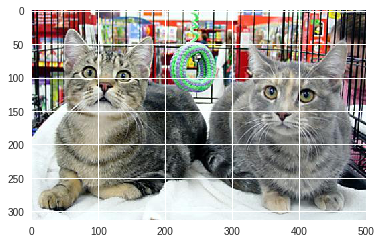

In [40]:
#sample cat image

image = plt.imread("PetImages/Cat/10064.jpg")
plt.imshow(image)

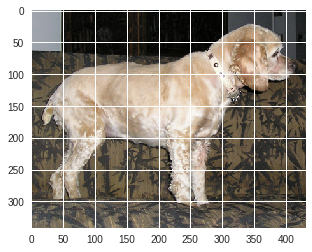

In [41]:
#sample dog image

image = plt.imread("PetImages/Dog/10064.jpg")
plt.imshow(image)


## Preprocessing Dataset

In [0]:
DIRECTORY = 'PetImages'
CATEGORIES = ['Dog','Cat']
IMG_SIZE = 90
training_data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)
  category_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      #converting to grayscale images
      gray_image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      #reshaping all images
      reshaped_img = cv2.resize(gray_image,(IMG_SIZE,IMG_SIZE))
      #normalising the image
      reshaped_img = reshaped_img/255.0
      #add reshaped images to an array, with labels
      training_data.append([reshaped_img,category_num])
    except Exception as e:
      #faulty images
      pass
        

In [0]:
import random

#shuffling the dataset
random.shuffle(training_data)

In [0]:
X = []
y = []

for feature, label in training_data:
  X.append(feature) #array of features
  y.append(label)   #array of labels
  
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #kers prerequisite

In [45]:
X.shape

(24946, 90, 90, 1)

## Keras CNN Model

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Flatten,Dropout,AveragePooling2D

In [47]:
#defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 88, 88, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 86, 86, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 17, 17, 128)       73856     
__________

In [0]:
#compiling model
model.compile(
             loss='binary_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [49]:
#training
model.fit(X,y, batch_size=100,
          epochs=25, validation_split=0.2)

Train on 19956 samples, validate on 4990 samples
Epoch 1/25
19956/19956 [==============================] - 29s 1ms/step - loss: 8.0689 - acc: 0.4966 - val_loss: 7.8233 - val_acc: 0.5146
Epoch 2/25
19956/19956 [==============================] - 28s 1ms/step - loss: 3.6728 - acc: 0.4940 - val_loss: 0.6931 - val_acc: 0.5146
Epoch 3/25
19956/19956 [==============================] - 27s 1ms/step - loss: 0.6933 - acc: 0.4980 - val_loss: 0.6938 - val_acc: 0.4854
Epoch 4/25
19956/19956 [==============================] - 28s 1ms/step - loss: 0.6932 - acc: 0.5086 - val_loss: 0.6932 - val_acc: 0.4854
Epoch 5/25
19956/19956 [==============================] - 27s 1ms/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6931 - val_acc: 0.5146
Epoch 6/25
19956/19956 [==============================] - 27s 1ms/step - loss: 0.6933 - acc: 0.5011 - val_loss: 0.6933 - val_acc: 0.4854
Epoch 7/25
19956/19956 [==============================] - 27s 1ms/step - loss: 0.6934 - acc: 0.4987 - val_loss: 0.6931 - val_acc:

In [50]:
%%bash
cd logs/cat_dog_cnn/
ls -l
# from google.colab import files

# files.download('logs')

total 14608
-rw-r--r-- 1 root root 1001446 Dec  7 08:04 events.out.tfevents.1544169213.301d95067c70
-rw-r--r-- 1 root root 1367097 Dec  7 08:18 events.out.tfevents.1544170515.301d95067c70
-rw-r--r-- 1 root root 2425024 Dec  7 08:30 events.out.tfevents.1544170738.301d95067c70
-rw-r--r-- 1 root root 2810015 Dec  7 08:39 events.out.tfevents.1544171464.301d95067c70
-rw-r--r-- 1 root root 3021764 Dec  7 08:41 events.out.tfevents.1544172035.301d95067c70
-rw-r--r-- 1 root root  737453 Dec  7 08:54 events.out.tfevents.1544172528.301d95067c70
-rw-r--r-- 1 root root 1460118 Dec  7 09:02 events.out.tfevents.1544172869.301d95067c70
-rw-r--r-- 1 root root 2117321 Dec  7 09:30 events.out.tfevents.1544174351.301d95067c70


In [62]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
IMAGE_NAME = fn


Saving index.jpg to index.jpg
User uploaded file "index.jpg" with length 5443 bytes


In [0]:
test_image = cv2.imread(IMAGE_NAME,cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image,(IMG_SIZE,IMG_SIZE))
test_image = test_image/255
test_image = np.array(test_image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [64]:
prediction = model.predict([test_image])
print(prediction)

[[6.880637e-05]]


In [65]:
prediction_out = [1 if value>0.49 else 0 for value in prediction]
prediction_out

[0]

In [66]:
print(CATEGORIES[int(prediction_out[0])])

Dog
